In [10]:
epochs_to_look_at = ['outcome_presentation_approach', 'outcome_presentation_avoid']
epochs_name = 'outcome_presentation'

subject = '2024-09-19_eleonora'

In [11]:
import os
import numpy as np
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

cleaned_file = '/Users/majafriedemann/pilot_eeg_data/reward-effort-task/' + subject + '/p01_task1-cleaned.fif'
annot_file = '/Users/majafriedemann/pilot_eeg_data/reward-effort-task/' + subject + '/p01_task1-annotations.fif'
raw = mne.io.read_raw_fif(cleaned_file).load_data() 
if os.path.exists(annot_file):
    annotations = mne.read_annotations(annot_file)
    raw = raw.set_annotations(annotations)

events, old_event_dict = mne.events_from_annotations(raw)
stimulus_to_custom = {
    'Stimulus/S  1': 'experiment_start',
    'Stimulus/S  2': 'block_start',
    'Stimulus/S  3': 'effort_presentation_approach',
    'Stimulus/S  4': 'effort_presentation_avoid',
    'Stimulus/S  5': 'outcome_presentation_approach',
    'Stimulus/S  6': 'outcome_presentation_avoid',
    'Stimulus/S  7': 'participant_choice_accept',
    'Stimulus/S  8': 'participant_choice_reject',
    'Stimulus/S  9': 'rating_question_reward',
    'Stimulus/S 10': 'rating_question_heart',
    'Stimulus/S 11': 'rating_response_reward',
    'Stimulus/S 12': 'rating_response_heart',
    'Stimulus/S 13': 'effort_started',
    'Stimulus/S 14': 'effort_threshold_crossed',
    'Stimulus/S 15': 'effort_success',
    'Stimulus/S 16': 'outcome_presentation_approach_success',
    'Stimulus/S 17': 'outcome_presentation_approach_failure',
    'Stimulus/S 18': 'outcome_presentation_approach_reject',
    'Stimulus/S 19': 'outcome_presentation_avoid_success',
    'Stimulus/S 20': 'outcome_presentation_avoid_failure',
    'Stimulus/S 21': 'outcome_presentation_avoid_reject',
    'Stimulus/S 22': 'experiment_end',
}
event_dict = {stimulus_to_custom[key]: value for key, value in old_event_dict.items() if key in stimulus_to_custom}
select_event_dict = {key: event_dict[key] for key in epochs_to_look_at}

epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, picks=['eeg'], event_id=select_event_dict, reject_by_annotation=True, preload=True, baseline=(-0.1, 0))

drop_log = [v[0]  if (len(v) > 0) else 'ok' for v in epochs.drop_log]
drop_log = np.array(drop_log)
drop_log = drop_log[drop_log != 'IGNORED']

if len(epochs) != len(drop_log[drop_log != 'BAD_']):
            raise Exception('Numbers of epochs do not match')

task_data_file = '/Users/majafriedemann/Documents/GitHub/reward-effort-task/experiment_code/pilot_data/' + subject + '_eeg.csv'
data = pd.read_csv(task_data_file)

data['droplog'] = drop_log
data = data[data['droplog'] == 'ok']

if len(epochs) != len(data):
       raise Exception('Number of epochs do not match.\n Found %i EEG events and %i csv events' % (len(epochs), len(data)))

metadata = pd.DataFrame(data=data)
epochs.metadata = metadata

reject_criteria = dict(eeg=200e-6)
epochs.drop_bad(reject=reject_criteria)

epochs_file = '/Users/majafriedemann/pilot_eeg_data/reward-effort-task/' + subject + '/' + epochs_name + '_epochs.fif'
epochs.save(epochs_file, overwrite=True)

Opening raw data file /Users/majafriedemann/pilot_eeg_data/reward-effort-task/2024-09-19_eleonora/p01_task1-cleaned.fif...
    Range : 0 ... 1083439 =      0.000 ...  4333.756 secs
Ready.
Reading 0 ... 1083439  =      0.000 ...  4333.756 secs...


/var/folders/d0/p878jscj4m1f6w4d3xn26m1w0000gn/T/ipykernel_8820/415193061.py:12: RuntimeWarning: This filename (/Users/majafriedemann/pilot_eeg_data/reward-effort-task/2024-09-19_eleonora/p01_task1-cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(cleaned_file).load_data()


Used Annotations descriptions: ['Comment/Active Shielding: On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 18', 'Stimulus/S 19', 'Stimulus/S 21', 'Stimulus/S 22']
Not setting metadata
400 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 400 events and 251 original time points ...
0 bad epochs dropped
Adding metadata with 33 columns
0 bad epochs dropped
Overwriting existing file.
Overwriting existing file.


/var/folders/d0/p878jscj4m1f6w4d3xn26m1w0000gn/T/ipykernel_8820/415193061.py:70: RuntimeWarning: This filename (/Users/majafriedemann/pilot_eeg_data/reward-effort-task/2024-09-19_eleonora/outcome_presentation_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(epochs_file, overwrite=True)


In [12]:
print(epochs.metadata.keys())

Index(['expName', 'curec_ID', 'trial_schedule', 'session_nr', 'date',
       'start_time', 'end_time', 'duration', 'participant', 'age', 'gender',
       'max_strength', 'block_number', 'trial_count', 'block_action_type',
       'block_global_effort_state', 'block_attention_focus', 'trial_rating',
       'trial_rating_time', 'trial_rating_random_start_pos', 'trial_effort',
       'trial_outcome_level', 'trial_actual_outcome', 'response',
       'response_time', 'result', 'points', 'cumulative_points',
       'effort_trace', 'effort_expended', 'effort_response_time',
       'final_bonus_payment', 'droplog'],
      dtype='object')


### P3 following outcome offer split by approach / avoid block type

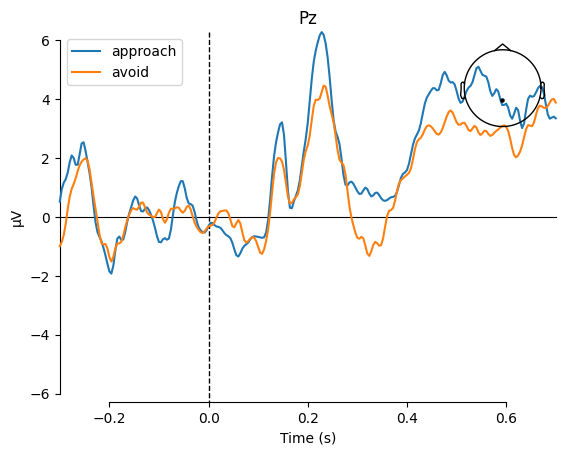

In [13]:
# Query epochs based on the 'block_action_type' in metadata
approach_epochs = epochs['block_action_type == "approach"']
avoid_epochs = epochs['block_action_type == "avoid"']

# Create evoked responses
approach_evoked = approach_epochs.average()
avoid_evoked = avoid_epochs.average()

# Dictionary of evoked responses
evokeds = dict(approach=approach_evoked, avoid=avoid_evoked)

# Create the comparison plot
fig, ax = plt.subplots()  # Explicitly create a figure and axis

# Plot evoked data
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False, axes=ax)

# Ensure canvas is drawn before saving or showing
if fig.canvas is None:
    fig.canvas = plt.FigureCanvas(fig)  # Create the canvas if it doesn't exist

# Show the plot
plt.show()


### Approach block type split by accept / reject response

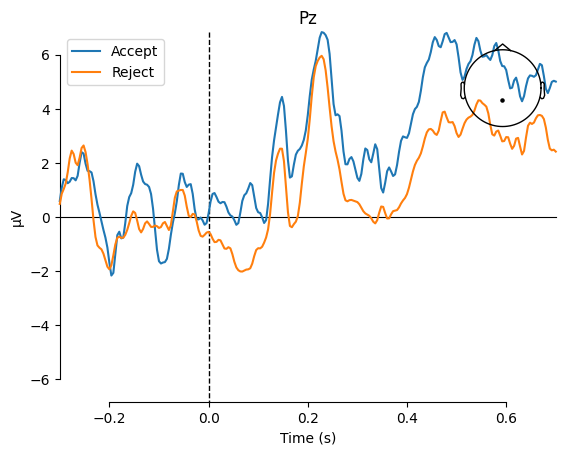

In [14]:
# Query epochs based on 'block_action_type' in metadata to get approach epochs
approach_epochs = epochs['block_action_type == "approach"']

# Get the metadata for approach epochs
metadata = approach_epochs.metadata

# Split the epochs based on the 'response' column (assumed to contain 'accept' or 'reject')
accept_epochs = approach_epochs['response == "accept"']
reject_epochs = approach_epochs['response == "reject"']

# Create evoked responses for each category (accept and reject)
accept_evoked = accept_epochs.average()
reject_evoked = reject_epochs.average()

# Dictionary of evoked responses (traces for each category)
evokeds = dict(Accept=accept_evoked, Reject=reject_evoked)

# Create the comparison plot
fig, ax = plt.subplots()  # Explicitly create a figure and axis

# Plot evoked data for both conditions (accept and reject)
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False, axes=ax)

# Ensure canvas is drawn before saving or showing
if fig.canvas is None:
    fig.canvas = plt.FigureCanvas(fig)  # Create the canvas if it doesn't exist

# Show the plot
plt.show()


### Approach block type split by outcome magnitude above / below median

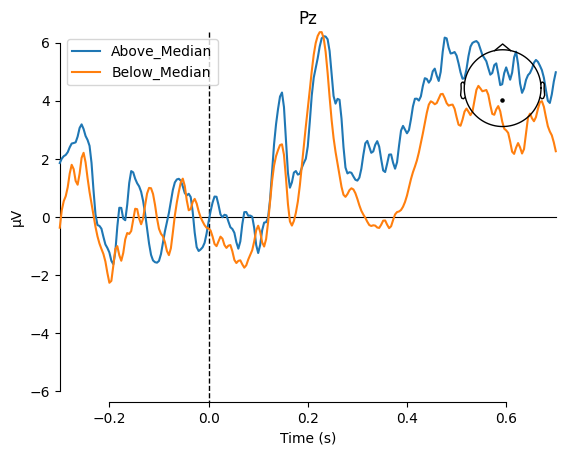

In [15]:
# Query epochs based on 'block_action_type' in metadata to get approach epochs
approach_epochs = epochs['block_action_type == "approach"']

# Get the metadata for approach epochs
metadata = approach_epochs.metadata

# Take the absolute value of 'trial_outcome_level'
abs_trial_outcome_level = np.abs(metadata['trial_outcome_level'])

# Calculate the median of the absolute 'trial_outcome_level'
trial_outcome_median = np.median(abs_trial_outcome_level)

# Split the epochs based on whether the absolute 'trial_outcome_level' is above or below the median
above_median_epochs = approach_epochs['abs(trial_outcome_level) > {}'.format(trial_outcome_median)]
below_median_epochs = approach_epochs['abs(trial_outcome_level) <= {}'.format(trial_outcome_median)]

# Create evoked responses for each category (above and below median)
above_median_evoked = above_median_epochs.average()
below_median_evoked = below_median_epochs.average()

# Dictionary of evoked responses (traces for each category)
evokeds = dict(Above_Median=above_median_evoked, Below_Median=below_median_evoked)

# Create the comparison plot
fig, ax = plt.subplots()  # Explicitly create a figure and axis

# Plot evoked data for both conditions (above and below median)
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False, axes=ax)

# Ensure canvas is drawn before saving or showing
if fig.canvas is None:
    fig.canvas = plt.FigureCanvas(fig)  # Create the canvas if it doesn't exist

# Show the plot
plt.show()


### Avoid block type split by accept / reject response

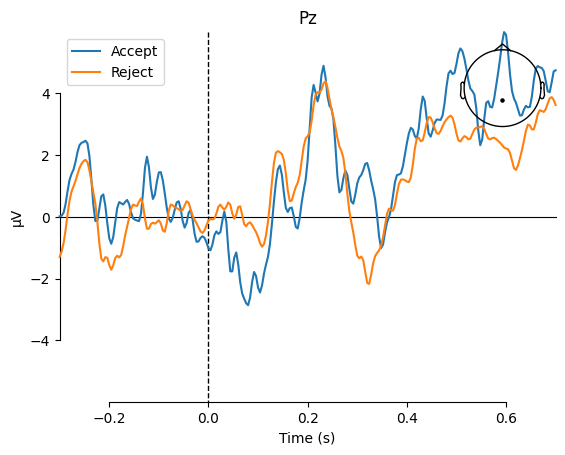

In [16]:
# Query epochs based on 'block_action_type' in metadata to get avoid epochs
avoid_epochs = epochs['block_action_type == "avoid"']

# Get the metadata for avoid epochs
metadata = avoid_epochs.metadata

# Split the epochs based on the 'response' column (assumed to contain 'accept' or 'reject')
accept_epochs = avoid_epochs['response == "accept"']
reject_epochs = avoid_epochs['response == "reject"']

# Create evoked responses for each category (accept and reject)
accept_evoked = accept_epochs.average()
reject_evoked = reject_epochs.average()

# Dictionary of evoked responses (traces for each category)
evokeds = dict(Accept=accept_evoked, Reject=reject_evoked)

# Create the comparison plot
fig, ax = plt.subplots()  # Explicitly create a figure and axis

# Plot evoked data for both conditions (accept and reject)
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False, axes=ax)

# Ensure canvas is drawn before saving or showing
if fig.canvas is None:
    fig.canvas = plt.FigureCanvas(fig)  # Create the canvas if it doesn't exist

# Show the plot
plt.show()


### Avoid block type split by absolute outcome magnitude above / below median

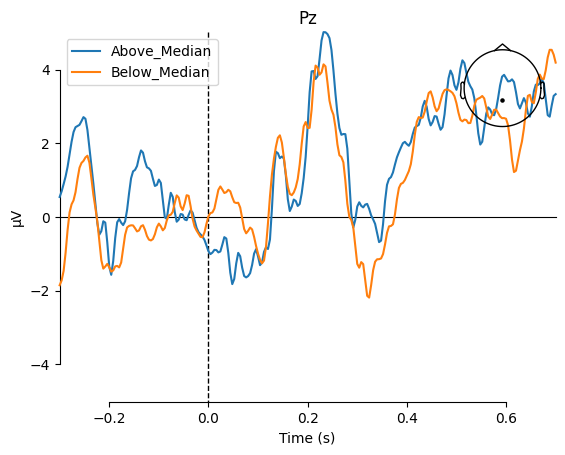

In [17]:
# Query epochs based on 'block_action_type' in metadata to get avoid epochs
avoid_epochs = epochs['block_action_type == "avoid"']

# Get the metadata for avoid epochs
metadata = avoid_epochs.metadata

# Take the absolute value of 'trial_outcome_level'
abs_trial_outcome_level = np.abs(metadata['trial_outcome_level'])

# Calculate the median of the absolute 'trial_outcome_level'
trial_outcome_median = np.median(abs_trial_outcome_level)

# Split the epochs based on whether the absolute 'trial_outcome_level' is above or below the median
above_median_epochs = avoid_epochs['abs(trial_outcome_level) > {}'.format(trial_outcome_median)]
below_median_epochs = avoid_epochs['abs(trial_outcome_level) <= {}'.format(trial_outcome_median)]

# Create evoked responses for each category (above and below median)
above_median_evoked = above_median_epochs.average()
below_median_evoked = below_median_epochs.average()

# Dictionary of evoked responses (traces for each category)
evokeds = dict(Above_Median=above_median_evoked, Below_Median=below_median_evoked)

# Create the comparison plot
fig, ax = plt.subplots()  # Explicitly create a figure and axis

# Plot evoked data for both conditions (above and below median)
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False, axes=ax)

# Ensure canvas is drawn before saving or showing
if fig.canvas is None:
    fig.canvas = plt.FigureCanvas(fig)  # Create the canvas if it doesn't exist

# Show the plot
plt.show()


In [18]:
# look at topopgraphies at speecific time points (e.g. 02-0.4s)
# look at the other epochs - effort, actual outcome, response 
# for effort - split only by offer magnitude
# for outcome - split by outcome magnitude and block type
# for response - split by response type, outcome magnitude, effort magnitude
# look at average over sensible electrodes, not only Pz